<a href="https://colab.research.google.com/github/Zeeshan506/ArchTechnology-Internship-Projects/blob/main/ARCH_TECHNOLOGIES_AI_Internship_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Task: Iris Flower Classification***




### Import Required Libraries

      1. **Pandas** - For loading and handling datasets  
      2. **NumPy** - For numerical operations  
      3. **Matplotlib** & **Seaborn** - For data visualization  
      4. **Scikit-learn** - Provides machine learning tools and utilities  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

# Load the Iris dataset
df = pd.read_csv('Iris.csv')


In [ ]:
df.head()

### Preprocessing the Dataset

In [ ]:
print('----- Preprocessing -----')
print('Data Set Shape:', df.shape)
print('\nData Set Description:')
print(df.describe())



------------------Preprocessing------------------

Data Set Shape (150, 6)

Data Set Info:

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
print("\nNull Values :",df.isnull().sum().sum())
print("\nDuplicate Rows",df.duplicated().sum())
print("\nDatatypes:",df.dtypes)


Null Values : 0

Duplicate Rows 0

Datatypes: Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


### Visualizing the Dataset
since we have to work with sepal length/width and petal length/width we will start by plotting them

<Axes: >

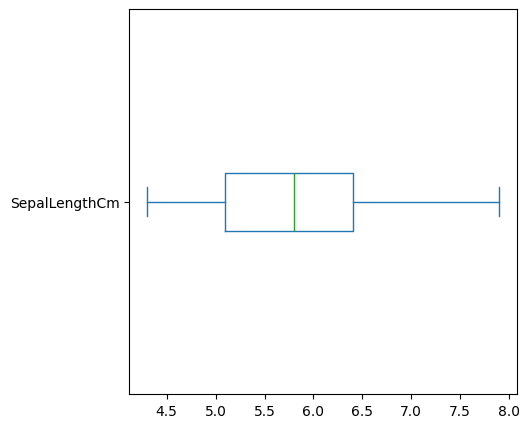

In [ ]:
df['SepalLengthCm'].plot(kind="box",figsize=(5,5),vert = False)

<Axes: >

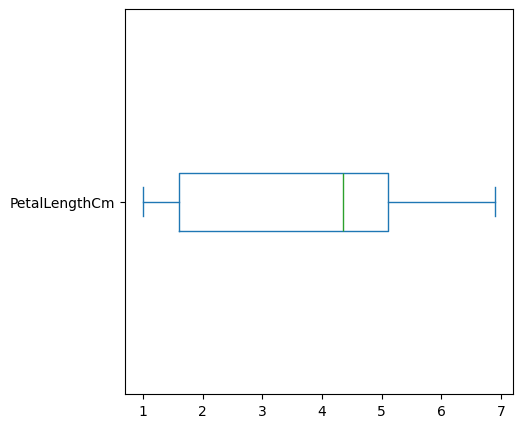

In [ ]:
df['PetalLengthCm'].plot(kind="box",figsize=(5,5),vert = False)

<Axes: >

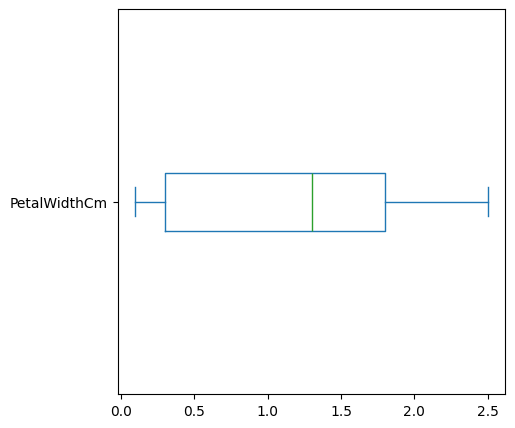

In [ ]:
df['PetalWidthCm'].plot(kind="box",figsize=(5,5),vert = False)

<Axes: >

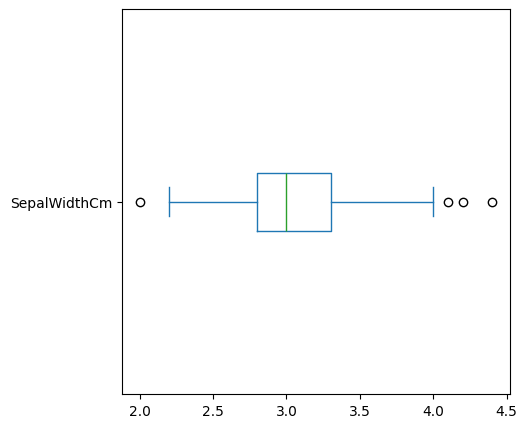

In [ ]:
df['SepalWidthCm'].plot(kind="box",figsize=(5,5),vert = False)

<Axes: xlabel='[PetalLengthCm]', ylabel='[PetalWidthCm]'>

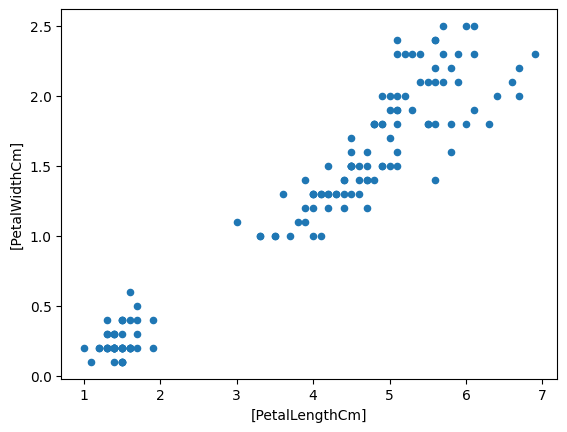

In [ ]:
df.plot(kind='scatter', x=['PetalLengthCm'], y=['PetalWidthCm'])

<Axes: xlabel='[SepalLengthCm]', ylabel='[PetalWidthCm]'>

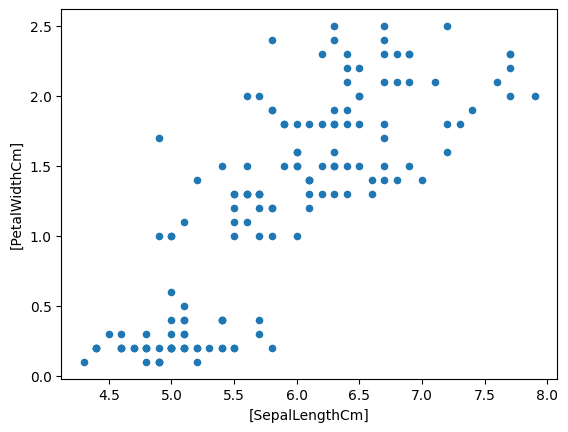

In [ ]:
df.plot(kind='scatter', x=['SepalLengthCm'], y=['PetalWidthCm'])

<Axes: xlabel='[SepalWidthCm]', ylabel='[PetalWidthCm]'>

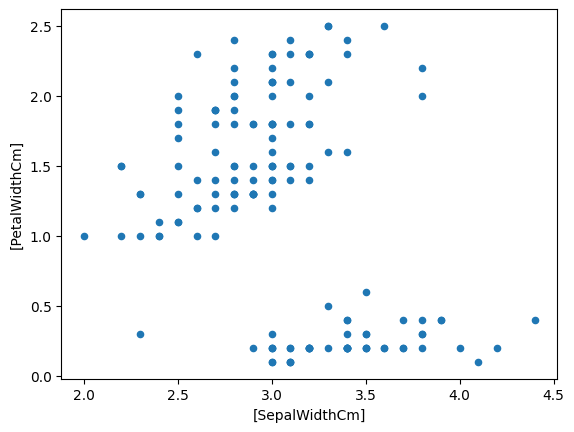

In [ ]:
df.plot(kind='scatter', x=['SepalWidthCm'], y=['PetalWidthCm'])

<Axes: xlabel='[SepalWidthCm]', ylabel='[SepalLengthCm]'>

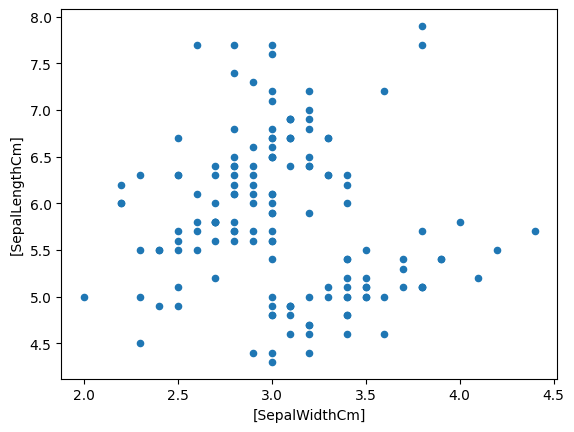

In [ ]:
df.plot(kind='scatter', x=['SepalWidthCm'], y=['SepalLengthCm'])

### Now lets handle the outlier removal part

we can use different methods like IQR, or Z-score method to remove outliers, but thery arent a permenant solution and we can reuse them untill we make a library. Better way is to use Feature Engine

In [ ]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.3 MB/s eta 0:00:00


<Axes: >

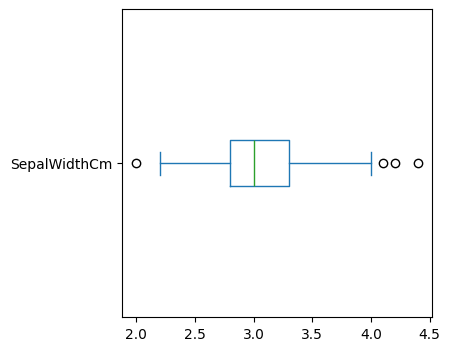

In [ ]:
import feature_engine
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import Winsorizer


winsor = Winsorizer(
    capping_method='iqr',
    tail='both',             # can be 'left', 'right', or 'both'
    fold=1.5,
    variables=['SepalWidthCm']  # list with a single variable, one with outlier
)

df_treated = winsor.fit_transform(df)
df['SepalWidthCm'].plot(kind="box", figsize= (4,4), vert= False)

<Axes: >

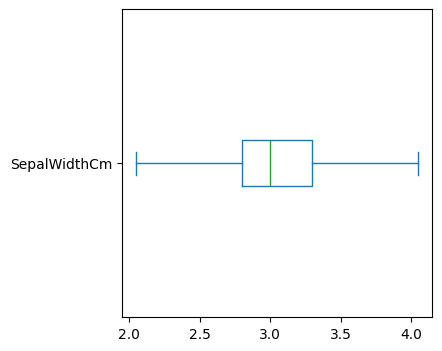

In [ ]:
df_treated['SepalWidthCm'].plot(kind="box", figsize= (4,4), vert= False)

Since we are rid of the outlier now we move to the next part. Encoding the target Labels.

### Encoding
In order for better understanding at machine level we simply encode the species into numbers

In [ ]:
print(df_treated['Species'].head())
print(df_treated['Species'].tail())

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, dtype: object


In [ ]:
le = LabelEncoder()
df_treated['Species']=le.fit_transform(df_treated['Species'])
print(df_treated['Species'].head())
print(df_treated['Species'].tail())

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64
145    2
146    2
147    2
148    2
149    2
Name: Species, dtype: int64


Lastly we perform Feature Scaling but in our case where there are only 150 records and the model being used is random forest, scaling usually doesnt take any effect. so we skip this.

### Next Part is Training


In [ ]:
X = df_treated.drop("Species", axis = 1)
Y = df_treated["Species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42 )

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
